# A1 - Analyzing Collected Repositories
This notebook investigates in detail which of the repositories collected via GitHub's API in [s1_collect.py](../s1_collect.py) fit the corpus and which had to be filtered out.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from src.db.database import connect
from src.config.states import *

## Collecting
In GitHub we searched for repositories, from any time, with the following search texts:
"Data Science", "Ciência de Dados", "Science des Données" or "Ciencia de los Datos".

In [2]:
with connect() as session:
    repositories = pd.read_sql_table("repositories", session.connection())
    total = len(repositories)
    print("A total of {} repositories were retrieved ".format(total))

A total of 327016 repositories were retrieved 


## Filtering
After collecting all repositories, we then checked which of them fit the requirements:
- At least 1 language, 1 commit and 1 contributor
- Is not a course project

#### Repositories with No Commits

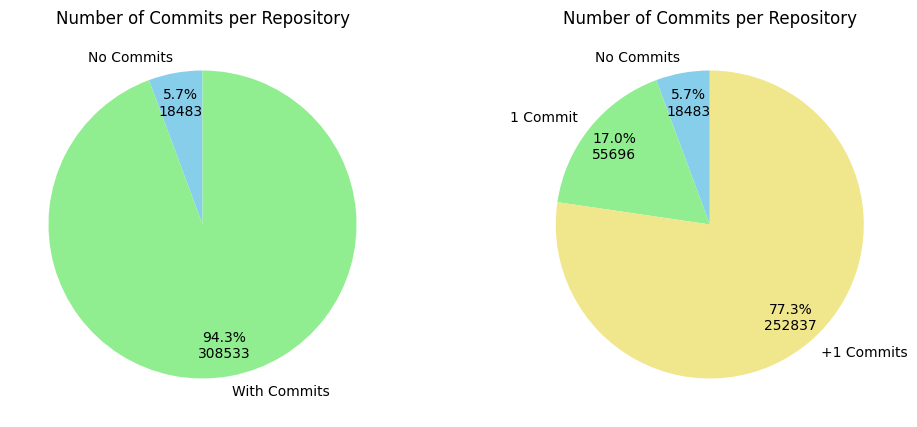

In [3]:
no_commits = repositories[(repositories.commits.isnull())]
one_commit = repositories[(repositories.commits == 1)]
more_one_commits = repositories[(repositories.commits > 1)]

data1 = [len(no_commits), len(one_commit) + len(more_one_commits)]
labels1 = ['No Commits', "With Commits"]
colors1 = ['skyblue', 'lightgreen']

fig1, ax1 = plt.subplots(figsize=(12,5), ncols=2)
ax1[0].pie(data1, labels=labels1, colors=colors1, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=90)
ax1[0].set_title("Number of Commits per Repository")

data2 = [len(no_commits), len(one_commit) , len(more_one_commits)]
labels2 = ['No Commits', "1 Commit", "+1 Commits"]
colors2 = ['skyblue', 'lightgreen', 'khaki']

ax1[1].pie(data2, labels=labels2, colors=colors2, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=90)
ax1[1].set_title("Number of Commits per Repository");


#### Repositories with No Contributors

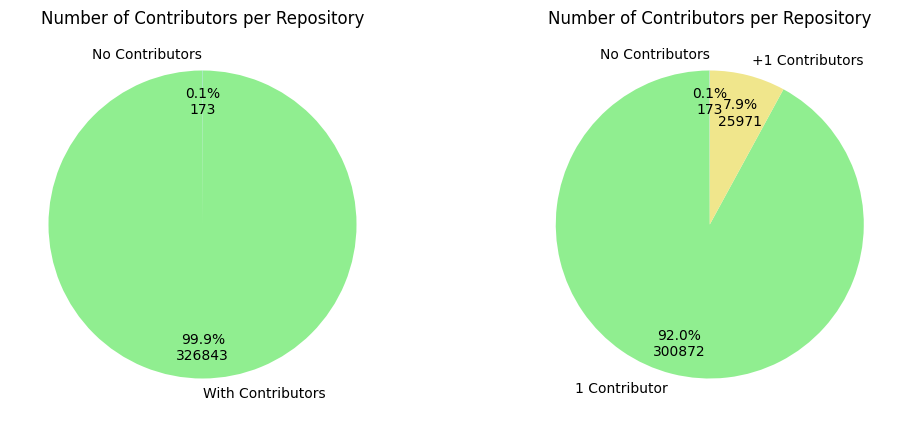

In [4]:
no_contributors = repositories[(repositories.contributors == 0)]
one_contributor = repositories[(repositories.contributors == 1)]
more_one_contributors = repositories[(repositories.contributors > 1)]

data3 = [len(no_contributors), len(one_contributor) + len(more_one_contributors)]
labels3 = ['No Contributors', "With Contributors"]
colors3 = ['skyblue', 'lightgreen']

fig2, ax2 = plt.subplots(figsize=(12,5), ncols=2)
ax2[0].pie(data3, labels=labels3, colors=colors3, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=90)
ax2[0].set_title("Number of Contributors per Repository")

data4 = [len(no_contributors), len(one_contributor) , len(more_one_contributors)]
labels4 = ['No Contributors', "1 Contributor", "+1 Contributors"]
colors4 = ['skyblue', 'lightgreen', 'khaki']

def piechart_format(prct_value):
    if prct_value < 1:
        return '{:.1f}%\n{:.0f}'.format(prct_value, (len(repositories) * prct_value / 100))
    elif prct_value < 10:
        return '\n{:.1f}%\n{:.0f}'.format(prct_value, (len(repositories) * prct_value / 100))
    else:
        return '{:.1f}%\n{:.0f}'.format(prct_value, (len(repositories) * prct_value / 100))


ax2[1].pie(data4, labels=labels4, colors=colors4, pctdistance=0.8,
        autopct=piechart_format, startangle=90)
ax2[1].set_title("Number of Contributors per Repository");

#### Repositories with No Languages

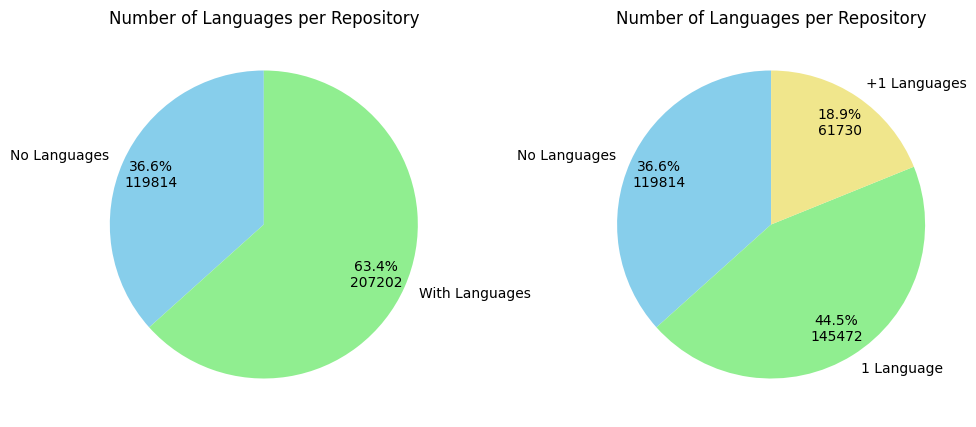

In [5]:
no_languages = repositories[(repositories.languages == 0)]
one_language = repositories[(repositories.languages == 1)]
more_one_languages = repositories[(repositories.languages > 1)]

data5 = [len(no_languages), len(one_language) + len(more_one_languages)]
labels5 = ['No Languages', "With Languages"]
colors5 = ['skyblue', 'lightgreen']

fig3, ax3 = plt.subplots(figsize=(12,5), ncols=2)
ax3[0].pie(data5, labels=labels5, colors=colors5, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=90)
ax3[0].set_title("Number of Languages per Repository")

data6 = [len(no_languages), len(one_language) , len(more_one_languages)]
labels6 = ['No Languages', "1 Language", "+1 Languages"]
colors6 = ['skyblue', 'lightgreen', 'khaki']

ax3[1].pie(data6, labels=labels6, colors=colors6, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=90)
ax3[1].set_title("Number of Languages per Repository");


#### Course Repositories

67467 75618 571 3203 31 146


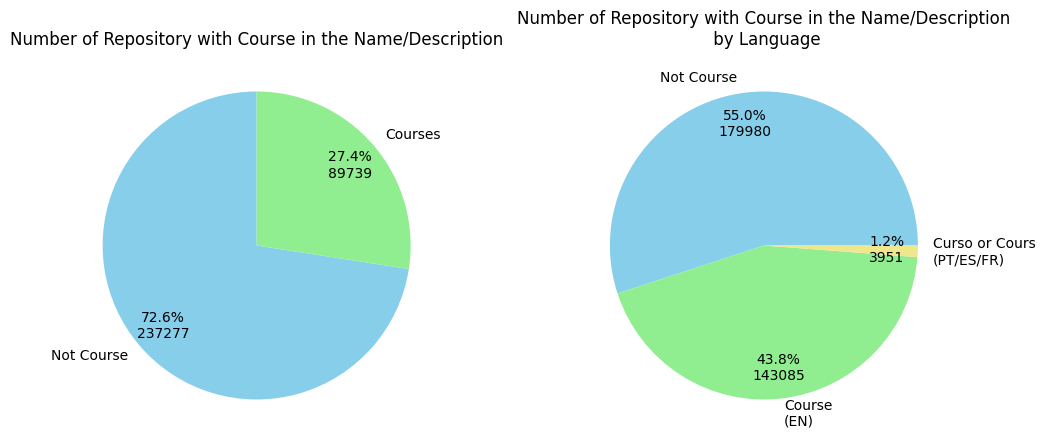

In [6]:
repositories[['user', 'name']] = repositories['repository'].str.split('/', expand=True)

en = repositories[repositories['name'].str.contains('course', case=False)]
en_desc = repositories[repositories['description'].fillna('').str.contains('course', case=False)]
pt_es = repositories[repositories['name'].str.contains('curso', case=False)]
pt_es_desc = repositories[repositories['description'].fillna('').str.contains('curso', case=False)]
fr = repositories[repositories['name'].str.contains('cours', case=False) &
                  ~repositories['name'].str.contains('course', case=False)]
fr_desc = repositories[repositories['description'].fillna('').str.contains('cours', case=False) &
                       ~repositories['description'].fillna('').str.contains('course', case=False)]

not_course = len(repositories) - len(en) - len(en_desc) - len(pt_es) - len(pt_es_desc) - len(fr) - len(fr_desc)
print(len(en), len(en_desc), len(pt_es), len(pt_es_desc), len(fr), len(fr_desc))

data5 = [not_course, len(en) + len(pt_es) + len(fr)]
labels5 = ['Not Course', "Courses"]
colors5 = ['skyblue', 'lightgreen']

fig4, ax4 = plt.subplots(figsize=(12,5), ncols=2)
ax4[0].pie(data5, labels=labels5, colors=colors5, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=90)
ax4[0].set_title("Number of Repository with Course in the Name/Description")

data6 = [not_course, len(en) + len(en_desc), len(pt_es) + len(pt_es_desc) + len(fr) + len(fr_desc)]
labels6 = ["Not Course", "Course\n(EN)", "Curso or Cours\n(PT/ES/FR)"]
colors6 = ['skyblue', 'lightgreen', 'khaki']

ax4[1].pie(data6, labels=labels6, colors=colors6, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(repositories) * prct_value / 100))), startangle=0)
ax4[1].set_title("Number of Repository with Course in the Name/Description\n by Language");

## Filtered and Excluded Repositories

In [7]:
with connect() as session:
    repositories = pd.read_sql_table("repositories", session.connection())
    repositories[['user', 'name']] = repositories['repository'].str.split('/', expand=True)

    total = len(repositories)
    print("A total of {} repositories were retrieved ".format(total))

A total of 327016 repositories were retrieved 


In [8]:
no_contributors = repositories.loc[(repositories['contributors'] == 0)]
display(len(no_contributors))

173

In [9]:
no_commits = repositories.loc[(repositories['commits'].isnull())]
display(len(no_commits))

18483

In [10]:
no_languages = repositories.loc[(repositories['languages'] == 0)]
display(len(no_languages))

119814

In [11]:
with connect() as session:
    courses_query = '''
                SELECT * FROM repositories
                WHERE (
                    repository LIKE "%/%course%" COLLATE NOCASE OR
                    repository LIKE "%/%cours%" COLLATE NOCASE OR
                    repository LIKE "%/%curso%" COLLATE NOCASE OR
                    description LIKE "%course%" COLLATE NOCASE OR
                    description LIKE "%cours%" COLLATE NOCASE OR
                    description LIKE "%curso%" COLLATE NOCASE
                )
                '''
    languages_query = '''
                    SELECT * FROM repositories
                    WHERE languages = 0
                      '''
    cmt_colab_query = '''
                    SELECT * FROM repositories
                    WHERE ((commits is null) or (contributors=0))
                      '''

    courses = pd.read_sql(courses_query, session.connection())
    languages = pd.read_sql(languages_query, session.connection())
    cmt_colab = pd.read_sql(cmt_colab_query, session.connection())

    print("Courses: {}".format(len(courses)))
    print("No Languages: {}".format(len(languages)))
    print("No Commits or No Colaborators: {}".format(len(cmt_colab)))

    set1 = set(courses.id)
    set2 = set(languages.id)
    set3 = set(cmt_colab.id)

Courses: 99254
No Languages: 119814
No Commits or No Colaborators: 18577


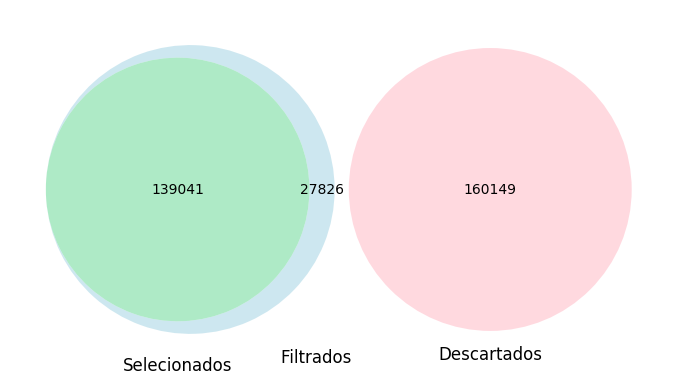

In [58]:
selected = repositories[~repositories.state.isin([REP_COLLECTED, REP_FILTERED, REP_DISCARDED])]
filtered = repositories[repositories.state==REP_FILTERED]

set_selected = set(selected.id)
set_filtered = set(filtered.id) | set_selected
set_discarded = set1 | set2 |set3

fig5, ax5 = plt.subplots(figsize=(7,5))
venn3([set_selected, set_filtered, set_discarded], ax=ax5, 
      set_colors=('darkgreen', 'lightblue', 'pink'),   
      set_labels=('\nSelecionados', '                                                Filtrados',
                  'Descartados'), alpha=0.60)

plt.tight_layout()
fig5.savefig("outputs/venn_repositories.png", dpi=500, format='png');

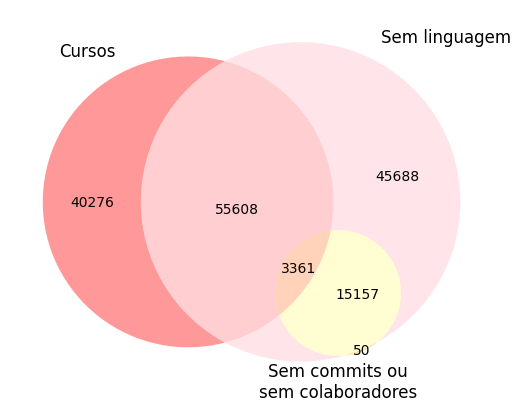

In [59]:
fig6, ax6 = plt.subplots(figsize=(10,5))
venn3([set1, set2, set3], ax=ax6, set_colors=('red', 'pink', 'orange', 'magenta'),
  set_labels=('Cursos', 'Sem linguagem', 'Sem commits ou\nsem colaboradores', ), alpha=0.40)
fig6.savefig("outputs/venn_repositories2.png", dpi=500, format='png');